In [1]:
import pandas as pd
from data_project.energyforecast import *
import matplotlib.pyplot as plt

%matplotlib widget

In [2]:
sample_df = aemo_price_demand("nsw", 2020, 5)
sample_df["SETTLEMENTDATE"] = pd.to_datetime(sample_df["SETTLEMENTDATE"])

sample_df

,REGION,SETTLEMENTDATE,TOTALDEMAND,RRP,PERIODTYPE
0,NSW1,2020-05-01 00:30:00,7395.35,38.03,TRADE
1,NSW1,2020-05-01 01:00:00,7203.69,17.06,TRADE
2,NSW1,2020-05-01 01:30:00,7029.99,19.34,TRADE
3,NSW1,2020-05-01 02:00:00,6842.29,6.67,TRADE
4,NSW1,2020-05-01 02:30:00,6542.63,0.00,TRADE
...,...,...,...,...,...
1483,NSW1,2020-05-31 22:00:00,7845.57,36.97,TRADE
1484,NSW1,2020-05-31 22:30:00,7759.72,38.95,TRADE
1485,NSW1,2020-05-31 23:00:00,7559.47,37.21,TRADE
1486,NSW1,2020-05-31 23:30:00,7412.36,37.16,TRADE


In [3]:
RRP_spikes = sample_df.loc[
    sample_df["RRP"] > 100, ["SETTLEMENTDATE", "TOTALDEMAND", "RRP"]
]

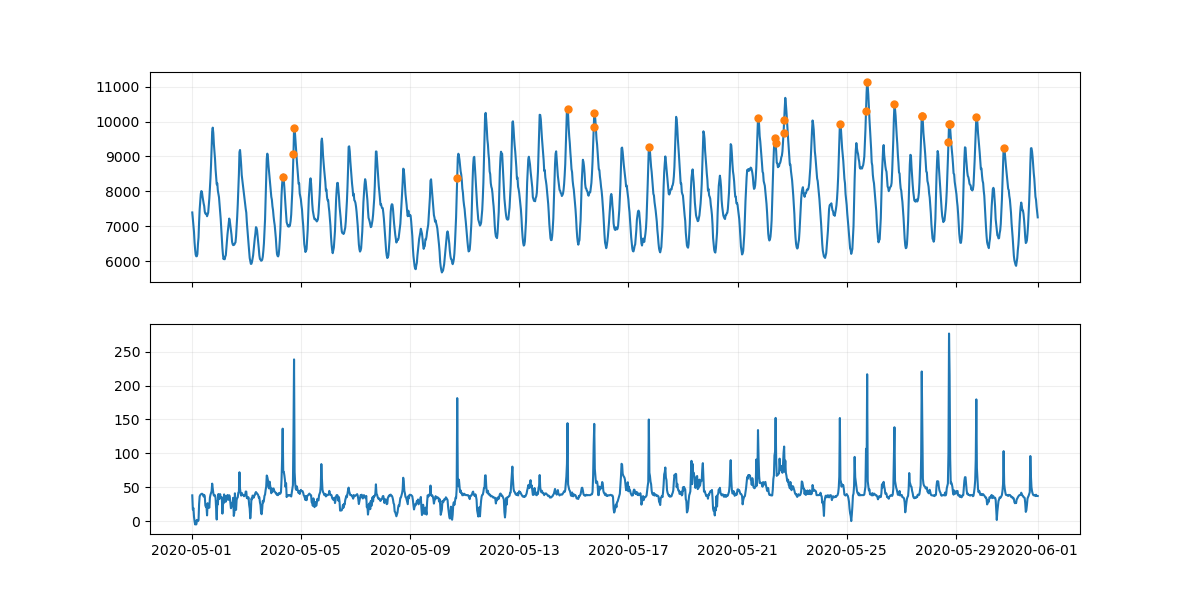

In [4]:
fig, axs = plt.subplots(nrows=2, figsize=(12, 6), sharex=True)

ax = axs[0]
ax.plot(sample_df["SETTLEMENTDATE"], sample_df["TOTALDEMAND"])
ax.plot(RRP_spikes["SETTLEMENTDATE"], RRP_spikes["TOTALDEMAND"], "o", ms=5)

ax = axs[1]
ax.plot(sample_df["SETTLEMENTDATE"], sample_df["RRP"])

for ax in axs:
    ax.grid(alpha=0.2)